<a href="https://colab.research.google.com/github/cecilia-wanja/Project-on-Financial-services-used-across-East-Africa/blob/master/Cecilia_Wanja_Independent_Project_week1_DataScience_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#H0:How we can determine which individuals are most likely to have or use a bank account.

In [0]:
# Data visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas_profiling as pp

In [53]:
#Looking at the first few rows
country=pd.read_csv("/content/country.csv")
country.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [54]:
#Getting the column names
country.columns.values

array(['country', 'year', 'uniqueid', 'Has a Bank account',
       'Type of Location', 'Cell Phone Access', 'household_size',
       'Respondent Age', 'gender_of_respondent', 'The relathip with head',
       'marital_status', 'Level of Educuation', 'Type of Job'],
      dtype=object)

In [55]:
#getting the statistical values in the numeric columns
country.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [56]:
#getting to know the information
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


The total number of entries are 23524.
Columns such as:country,Has a bank account,Type of location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head ,marital_status ,Level of Educuation,Type of Job .
have missing values





# **CLEANING DATA**

In [57]:
#Identifying missing data
country.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

There are null values in all the columns except :year and uniqueid

In [58]:
#Dealing with missing values

finance=country.dropna()
finance.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [13]:
pp.ProfileReport(finance)

Number of variables,14
Number of observations,23343
Total Missing (%),0.0%
Total size in memory,2.5 MiB
Average record size in memory,112.0 B
Numeric,4
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
#dealing with outliers
#I decided to retain the outliers as well as anomalies in the data as they proved to be useful


Processing columns

In [59]:
#dropped the unnecessary column
finance.drop(["uniqueid"],axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [60]:
finance.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [61]:
#checking for unexpected datatypes
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 12 columns):
country                   23343 non-null object
year                      23343 non-null int64
Has a Bank account        23343 non-null object
Type of Location          23343 non-null object
Cell Phone Access         23343 non-null object
household_size            23343 non-null float64
Respondent Age            23343 non-null float64
gender_of_respondent      23343 non-null object
The relathip with head    23343 non-null object
marital_status            23343 non-null object
Level of Educuation       23343 non-null object
Type of Job               23343 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


In [62]:
#resolving anomalies
finance.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [63]:

#finance

ind = finance[finance['year'] > 2018].index
ind
finance = finance.drop(ind)
finance['year'].unique()

array([2018, 2016, 2017])

In [70]:
#Renaming the columns for uniformity
finance1 = finance.rename(columns={"country":"Country","year":"Year","Has a Bank account":"Bank_account","Type of Location":"Location","Cell Phone Access":"Cell_phone_access","Respondent Age":"Age","The relathip with head":"Relationship","Level of Educuation":"Education_level","Type of Job":"Job_type"})
finance1.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# **UNIVARIATE ANALYSIS**

In [20]:

finance1.describe()

,Year,household_size,Age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [21]:
finance1["Country"].mode()

0    Rwanda
dtype: object

In [22]:
finance1["Year"].mode()

0    2016
dtype: int64

In [23]:
finance1["Bank_account"].mode()

0    No
dtype: object

In [24]:
finance1["household_size"].mode()

0    2.0
dtype: float64

In [25]:
finance1["Age"].mode()

0    30.0
dtype: float64

In [26]:
finance1["gender_of_respondent"].mode()

0    Female
dtype: object

In [27]:
finance1["Relationship"].mode()

0    Head of Household
dtype: object

In [28]:
finance1["marital_status"].mode()

0    Married/Living together
dtype: object

In [29]:
finance1["Education_level"].mode()

0    Primary education
dtype: object

In [30]:
finance1["Job_type"].mode()

0    Self employed
dtype: object

Measures of Dispersion

In [31]:
#variance of the data
finance.var()

year                0.721031
household_size      5.204214
Respondent Age    272.907247
dtype: float64

In [32]:
#range of household size column
maxhousehold = finance1.household_size.max()
minhousehold = finance1.household_size.min()
range = maxhousehold - minhousehold
range

21.0

In [33]:
#range of Age column
maxage = finance1.Age.max()
minage = finance1.Age.min()
range = maxage - minage
range

84.0

In [34]:
#skewness
finance1.skew()

Year              0.042833
household_size    0.974183
Age               0.840615
dtype: float64

In [35]:
#kurtosis of the data
finance1.kurt()

Year             -1.611829
household_size    1.153836
Age               0.098268
dtype: float64

In [36]:
finance1.Age.unique()

array([ 24.,  70.,  26.,  34.,  32.,  42.,  54.,  76.,  40.,  69.,  64.,
        31.,  38.,  47.,  27.,  48.,  25.,  21.,  18.,  22.,  58.,  55.,
        62.,  29.,  35.,  45.,  67.,  19.,  80.,  66.,  50.,  33.,  28.,
        51.,  16.,  17.,  30.,  37.,  59.,  65.,  46.,  56.,  52.,  23.,
        43.,  49.,  44.,  72.,  53.,  63.,  39.,  81.,  78.,  36.,  20.,
        60.,  95.,  71.,  57.,  85.,  68.,  41.,  61.,  75.,  86.,  73.,
        93.,  74.,  88.,  90.,  77.,  84.,  82.,  89.,  79.,  83.,  94.,
        87.,  92.,  91.,  98.,  97.,  96.,  99., 100.])

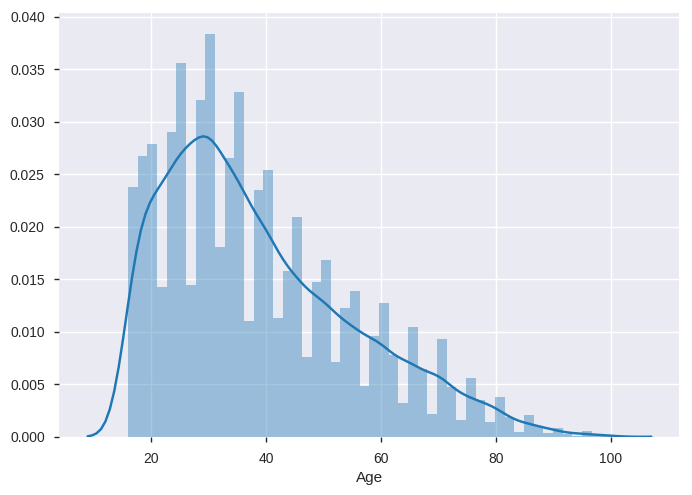

In [37]:
#histogram displaying the column Age
#It is rightly inclined but still portrays a normal distribution
sns.distplot(finance1['Age'], kde=True)

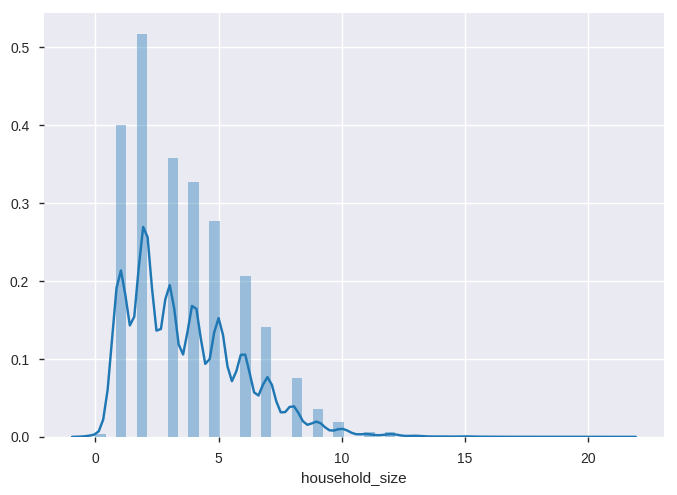

In [38]:
#histogram displaying the column household size
sns.distplot(finance1['household_size'], kde=True)

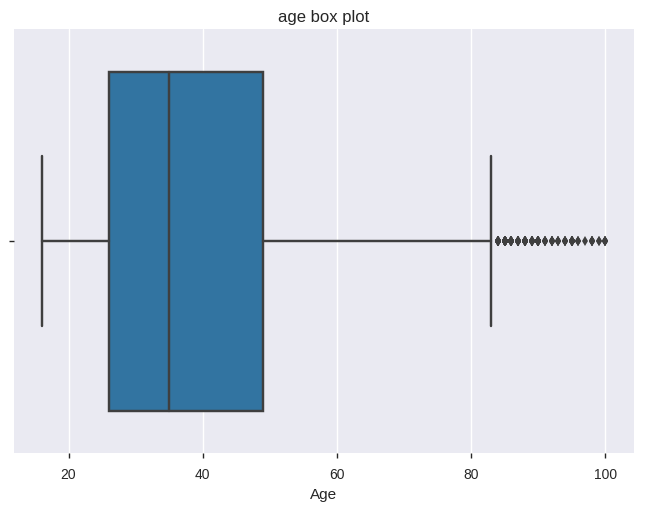

In [39]:
#Boxplot displaying the column age
#The data is tightly grouped
#There are presence of outliers in the column that were retained since they proved useful
agecolumn=finance1.Age
sns.boxplot(agecolumn)
plt.title("age box plot")
plt.show()

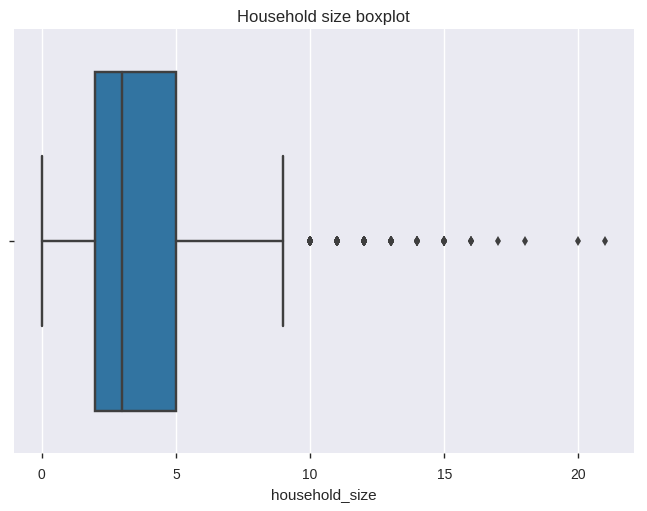

In [40]:
household_size = finance1.household_size
sns.boxplot(household_size)
plt.title("Household size boxplot")
plt.show()

In [41]:
#frequency table of the age,year and household size column
finance1.Age.value_counts()

30.0     1043
35.0      831
25.0      785
28.0      742
32.0      707
40.0      682
20.0      622
26.0      611
18.0      583
23.0      580
27.0      566
45.0      561
22.0      560
24.0      558
38.0      551
33.0      526
34.0      515
29.0      514
17.0      474
21.0      469
19.0      466
31.0      462
16.0      459
36.0      456
50.0      446
42.0      444
37.0      432
39.0      370
43.0      368
60.0      362
         ... 
66.0      118
72.0       97
71.0       94
73.0       90
69.0       87
78.0       82
76.0       72
74.0       62
79.0       57
77.0       56
85.0       55
82.0       40
83.0       33
90.0       28
86.0       25
88.0       24
81.0       24
84.0       20
95.0       18
89.0       16
87.0       15
92.0        7
98.0        6
94.0        5
91.0        5
100.0       5
93.0        4
96.0        3
99.0        2
97.0        1
Name: Age, Length: 85, dtype: int64

In [42]:
finance1.household_size.value_counts()

2.0     5072
1.0     3928
3.0     3513
4.0     3199
5.0     2716
6.0     2028
7.0     1378
8.0      740
9.0      354
10.0     191
12.0      66
11.0      66
0.0       36
13.0      25
15.0      11
14.0       9
16.0       4
18.0       1
20.0       1
21.0       1
17.0       1
Name: household_size, dtype: int64

In [43]:
finance1.Year.value_counts()

2016    8683
2018    8157
2017    6500
Name: Year, dtype: int64

# BIVARIATE ANALYSIS

In [0]:
#In this section I made use of scatter plots,line charts to determine the relationship between variables

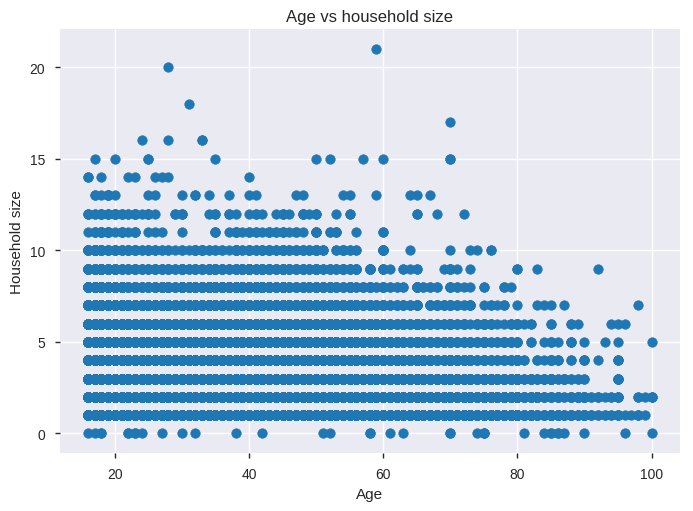

In [45]:
#scatter plot 
#Age vs household size
plt.scatter(finance1["Age"],finance1["household_size"])
plt.title("Age vs household size")
plt.xlabel("Age")
plt.ylabel("Household size")
plt.show()
#The distribution is not normal, but is inclined more to the young people as compared to the old people

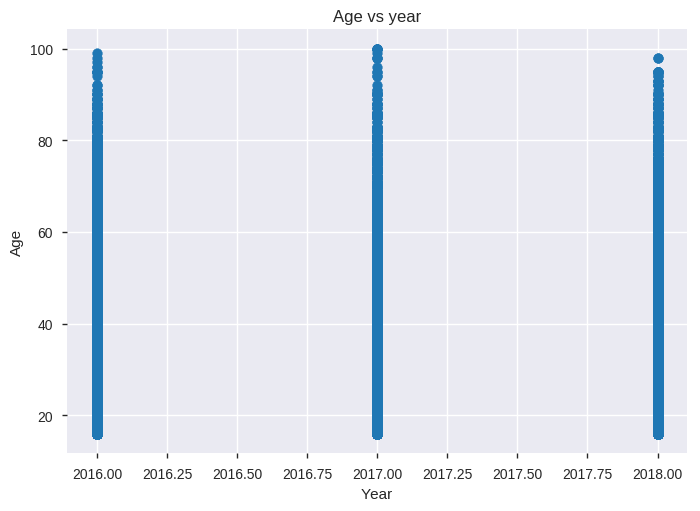

In [46]:
#scatter plot between age and year
plt.scatter(finance1["Year"],finance1["Age"])
plt.title("Age vs year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()
#In each of those years the distribution starts becoming scarce as we progress to the older people

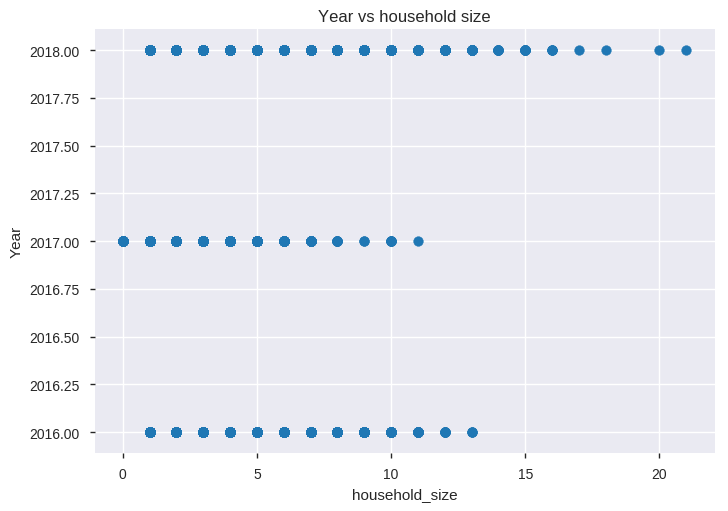

In [47]:
#year vs household size
plt.scatter(finance1["household_size"],finance1["Year"])
plt.title("Year vs household size")
plt.xlabel("household_size")
plt.ylabel("Year")
plt.show()
#the transition from 2016 to 2017 showed a reduction in the household size by the families in the survey, but the number showed a steady increse in the year 2018.

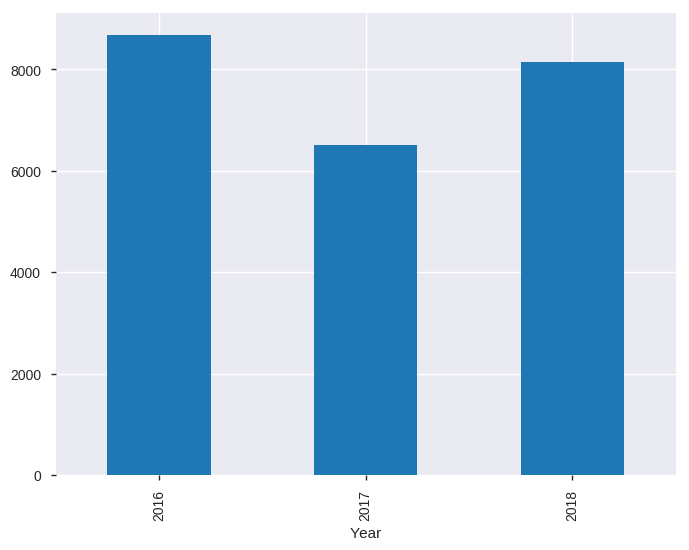

In [48]:
finance1 = finance1.groupby(['Year'])['Year'].count()
finance1

finance1.plot(kind='bar', figsize=(8, 6))
plt.show()


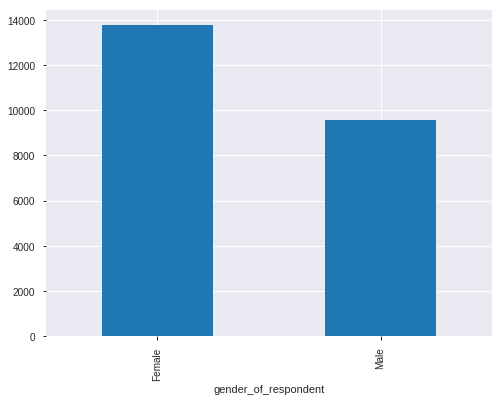

In [65]:
finance1 = finance1.groupby(['gender_of_respondent'])['gender_of_respondent'].count()
finance1

finance1.plot(kind='bar', figsize=(8, 6))
plt.show()
#The females show a larger number in financial inclusion as compared to the male

Year
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: household_size, dtype: object

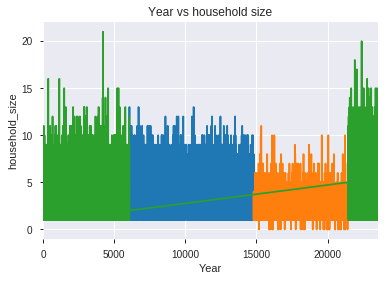

In [71]:
var = finance1.groupby('Year').household_size
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('household_size')
ax1.set_title("Year vs household size")
var.plot(kind='line')
#No normal distribution between the two variables

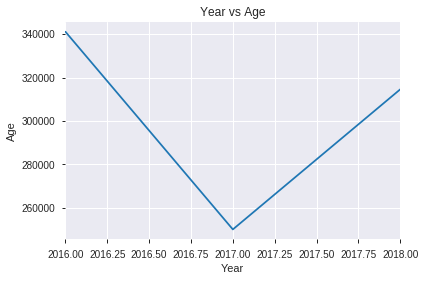

In [72]:
#linegraph between years and Age
var = finance1.groupby('Year').Age.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Age')
ax1.set_title("Year vs Age")
var.plot(kind='line')
#2016 showed the highest case of financial inclusion then a tremendous drop in 2017 and a recovery in 2018

In [73]:
#correlation between the two variables
corr = finance1["Age"].corr(finance["household_size"],method = "pearson")
corr
#no correlation at all

-0.11967115234154871

# MULTIVARIATE **ANALYSIS** 

In [103]:
finance1.head()

,Country,Year,Bank_account,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [104]:
#Creating Dummy Variables to perform Principal Component Analysis easily and accurately with all the associated variable
import dask.dataframe as dd
dummy = dd.get_dummies(finance1)
dummy.head()

,Year,household_size,Age,Country_Kenya,Country_Rwanda,Country_Tanzania,Country_Uganda,Bank_account_No,Bank_account_Yes,Location_Rural,Location_Urban,Cell_phone_access_No,Cell_phone_access_Yes,gender_of_respondent_Female,gender_of_respondent_Male,Relationship_Child,Relationship_Head of Household,Relationship_Other non-relatives,Relationship_Other relative,Relationship_Parent,Relationship_Spouse,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,Education_level_6,Education_level_No formal education,Education_level_Other/Dont know/RTA,Education_level_Primary education,Education_level_Secondary education,Education_level_Tertiary education,Education_level_Vocational/Specialised training,Job_type_Dont Know/Refuse to answer,Job_type_Farming and Fishing,Job_type_Formally employed Government,Job_type_Formally employed Private,Job_type_Government Dependent,Job_type_Informally employed,Job_type_No Income,Job_type_Other Income,Job_type_Remittance Dependent,Job_type_Self employed
0,2018,3.0,24.0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2018,5.0,70.0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2018,5.0,26.0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2018,5.0,34.0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2018,8.0,26.0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [105]:
dummy.shape

(23340, 43)

In [106]:
#Preprocessing
#Dividing my features into the feature set and corresponding labels: X and Y respectively.
x = finance1.drop("Bank_account",1)
y = finance1["Bank_account"]
x.head()


,Country,Year,Location,Cell_phone_access,household_size,Age,gender_of_respondent,Relationship,marital_status,Education_level,Job_type
0,Kenya,2018,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [107]:
x.shape

(23340, 11)

In [108]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Bank_account, dtype: object

In [109]:
y.shape

(23340,)

In [0]:
#creating dummy for the categorical data
x = pd.get_dummies(x)

In [111]:

#splitting the dats into training and test set
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_test, y_train, y_test

(       Year  ...  Job_type_Self employed
 1298   2018  ...                       0
 15218  2017  ...                       0
 6586   2016  ...                       0
 9065   2016  ...                       0
 9193   2016  ...                       0
 12345  2016  ...                       1
 18984  2017  ...                       0
 13582  2016  ...                       0
 8250   2016  ...                       0
 17552  2017  ...                       1
 20313  2017  ...                       1
 9818   2016  ...                       0
 17529  2017  ...                       1
 3237   2018  ...                       0
 11854  2016  ...                       0
 7297   2016  ...                       0
 21661  2018  ...                       0
 7310   2016  ...                       0
 21534  2018  ...                       0
 16175  2017  ...                       0
 14475  2016  ...                       0
 20279  2017  ...                       1
 2399   2018  ...                 

In [112]:
#Standardisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_train
x_test

array([[ 1.20555418, -0.3036391 ,  0.06866261, ...,  4.5876573 ,
        -0.34531945, -0.61686344],
       [ 0.02541628, -0.74081647,  0.129385  , ..., -0.21797618,
        -0.34531945,  1.62110434],
       [ 1.20555418,  1.44507037, -0.78145086, ..., -0.21797618,
        -0.34531945, -0.61686344],
       ...,
       [ 1.20555418, -0.3036391 , -1.38867476, ..., -0.21797618,
         2.8958693 , -0.61686344],
       [-1.15472161, -1.17799383,  0.19010739, ..., -0.21797618,
        -0.34531945, -0.61686344],
       [ 1.20555418, -1.17799383,  1.4045552 , ..., -0.21797618,
        -0.34531945, -0.61686344]])

In [113]:
x_test.shape

(5835, 41)

In [114]:
#Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_train
x_test
#all the features in the feature set will be returned for both the training and test sets.

array([[-8.59873784e-01,  2.67154195e-02, -1.40518502e+00, ...,
         7.73654824e-16,  1.79009756e-16,  1.37136827e-16],
       [ 2.73307334e+00, -1.73802869e+00, -1.64049983e-01, ...,
        -1.57390328e-16,  4.35713026e-16,  5.41440457e-17],
       [-8.61847244e-01, -2.52337160e+00, -6.16074963e-01, ...,
        -1.97790323e-16, -5.69126370e-17, -2.23685656e-16],
       ...,
       [ 1.11099496e+00, -2.27262600e+00, -1.33144654e+00, ...,
        -2.81057050e-16,  8.24326889e-16, -1.26541142e-16],
       [-1.42419312e+00,  1.98397288e+00,  6.02227142e-01, ...,
         1.03764943e-17, -2.23446091e-16, -3.34707959e-16],
       [-2.85986979e-01,  5.41525349e-01,  2.71902892e-01, ...,
        -1.66533454e-16,  1.22124533e-15, -5.84508139e-16]])

In [86]:
#Explained Variance Ratio
#returns the variance caused by each of the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.01866239e-01, 7.25205268e-02, 6.96838796e-02, 6.19553820e-02,
       5.15840205e-02, 4.60040027e-02, 4.00582416e-02, 3.58566937e-02,
       3.49347786e-02, 3.12941793e-02, 2.96544609e-02, 2.73399507e-02,
       2.66905306e-02, 2.51906413e-02, 2.49903428e-02, 2.47468335e-02,
       2.46627077e-02, 2.43681225e-02, 2.40591172e-02, 2.40492225e-02,
       2.37749887e-02, 2.31486758e-02, 2.19824213e-02, 2.10147583e-02,
       1.97996282e-02, 1.92441237e-02, 1.55512523e-02, 1.32134227e-02,
       1.13362550e-02, 1.10784882e-02, 9.41620033e-03, 8.92991185e-03,
       2.53090161e-31, 7.08527937e-33, 4.25820387e-33, 2.79159000e-33,
       1.83493787e-33, 1.50371732e-33, 1.07334583e-33, 6.33176612e-34,
       5.87570221e-34])

In [116]:
#Using 1 Principal Component
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[-0.85983105],
       [ 2.73306264],
       [-0.86178331],
       ...,
       [ 1.11100513],
       [-1.42423597],
       [-0.28601543]])

In [117]:
x_test.shape

(5835, 1)

In [118]:
#Training our model and Making predictions using 1 Principal component
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [119]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))


[[5021    0]
 [ 814    0]]
Accuracy0.8604970008568981


In [99]:
y_pred.shape

(5835,)

In [100]:
y_test.shape

(4668, 2)

In [93]:
from sklearn.decomposition import PCA
x = finance1.drop("Bank_account",1)
y = finance1["Bank_account"]
x = pd.get_dummies(x)
y = pd.get_dummies(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[ 0.19442599,  2.43225797],
       [-1.48874171,  0.73267489],
       [-0.37046905,  0.93042689],
       ...,
       [-2.39090091, -1.71292471],
       [ 0.30337901, -1.73162753],
       [-0.90279567,  2.65184858]])

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
a = accuracy_score(y_test, y_pred)
print(cm)

[[5021    0]
 [ 814    0]]


In [122]:
#  Accuracy_score
# 
print('Accuracy '+ str(a))

Accuracy 0.8604970008568981


In [97]:
from sklearn.decomposition import PCA
x = finance1.drop("Bank_account",1)
y = finance1["Bank_account"]
x = pd.get_dummies(x)
y = pd.get_dummies(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_test

array([[ 0.19445676,  2.43144882, -0.43173427],
       [-1.4888455 ,  0.73337443, -1.82033432],
       [-0.37056196,  0.93164567, -2.31627433],
       ...,
       [-2.39089563, -1.71265507, -1.41865304],
       [ 0.30336134, -1.73211269,  2.22891797],
       [-0.90282879,  2.65253045,  1.89462719]])